In [1]:
import sys
import os

# Automatic search for project processing
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

In [2]:
from scripts.preprocess import file_to_pd

df = file_to_pd('../Data/output.csv')

[Fold 1/5] MSE=0.000000, Accuracy=8.25%
[Fold 2/5] MSE=0.000000, Accuracy=5.25%
[Fold 3/5] MSE=0.000000, Accuracy=8.25%
[Fold 4/5] MSE=0.000001, Accuracy=12.25%
[Fold 5/5] MSE=0.000000, Accuracy=12.00%
[Fold 1/5] MSE=0.000000, Accuracy=6.00%
[Fold 2/5] MSE=0.000001, Accuracy=3.50%
[Fold 3/5] MSE=0.000000, Accuracy=7.25%
[Fold 4/5] MSE=0.000000, Accuracy=11.25%
[Fold 5/5] MSE=0.000001, Accuracy=6.50%
[Fold 1/5] MSE=0.000000, Accuracy=55.00%
[Fold 2/5] MSE=0.000000, Accuracy=60.00%
[Fold 3/5] MSE=0.000000, Accuracy=50.00%
[Fold 4/5] MSE=0.000000, Accuracy=60.00%
[Fold 5/5] MSE=0.000000, Accuracy=65.00%

📋 Metrics after cross validation:
               MSE      RMSE       MAE  MAPE (%)        R²  Accuracy < 0.0001
Random Forest  0.0  0.000545  0.000270  0.274993  0.954626                9.2
XGBoost        0.0  0.000587  0.000357  0.270314  0.951064                6.9
MLP            0.0  0.000280  0.000157  0.015234  0.987768               58.0

📄 Metrics saved in: results/cv_metrics_th=0.

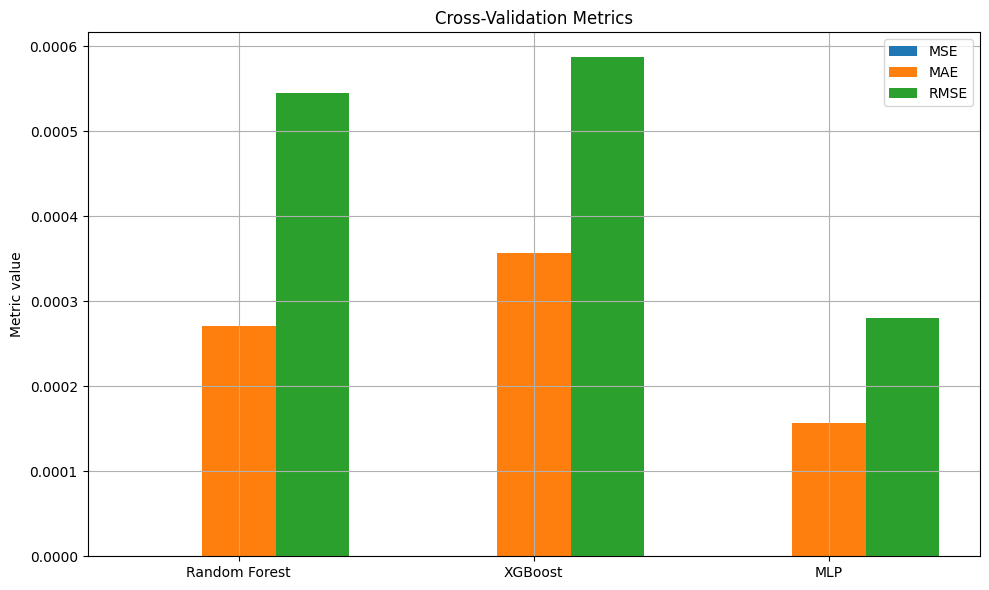

📊 Graph saved in: img/cv_metrics_th=0.0001.png


In [3]:
from scripts.evaluate import k_fold_cross_val
from scripts.render import compare_cv_results
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

rf_metrics = k_fold_cross_val(df, model_fn=lambda: RandomForestRegressor(), use_scaling=False)
xgb_metrics = k_fold_cross_val(df, model_fn=lambda: XGBRegressor(), use_scaling=False)
mlp_metrics = k_fold_cross_val(df, model_fn=lambda: None, use_scaling=True, use_torch_wrapper=True)

compare_cv_results(
    results={
        "Random Forest": rf_metrics,
        "XGBoost": xgb_metrics,
        "MLP": mlp_metrics
    },
    title="Cross-Validation Metrics",
    save_path_img="img/cv_metrics_th=0.0001.png",
    save_path_csv="results/cv_metrics_th=0.0001.csv"
)

[Fold 1/5] MSE=0.000000, Accuracy=80.25%
[Fold 2/5] MSE=0.000000, Accuracy=76.75%
[Fold 3/5] MSE=0.000000, Accuracy=85.00%
[Fold 4/5] MSE=0.000001, Accuracy=78.50%
[Fold 5/5] MSE=0.000000, Accuracy=65.50%
[Fold 1/5] MSE=0.000000, Accuracy=80.50%
[Fold 2/5] MSE=0.000001, Accuracy=81.50%
[Fold 3/5] MSE=0.000000, Accuracy=85.75%
[Fold 4/5] MSE=0.000000, Accuracy=74.25%
[Fold 5/5] MSE=0.000001, Accuracy=67.00%
[Fold 1/5] MSE=0.000000, Accuracy=100.00%
[Fold 2/5] MSE=0.000000, Accuracy=100.00%
[Fold 3/5] MSE=0.000000, Accuracy=100.00%
[Fold 4/5] MSE=0.000001, Accuracy=100.00%
[Fold 5/5] MSE=0.000000, Accuracy=100.00%

📋 Metrics after cross validation:
               MSE      RMSE       MAE  MAPE (%)        R²  Accuracy < 0.005
Random Forest  0.0  0.000543  0.000269  0.275373  0.955109              77.2
XGBoost        0.0  0.000586  0.000355  0.270445  0.951184              77.8
MLP            0.0  0.000433  0.000221  0.021554  0.969834             100.0

📄 Metrics saved in: results/cv_metri

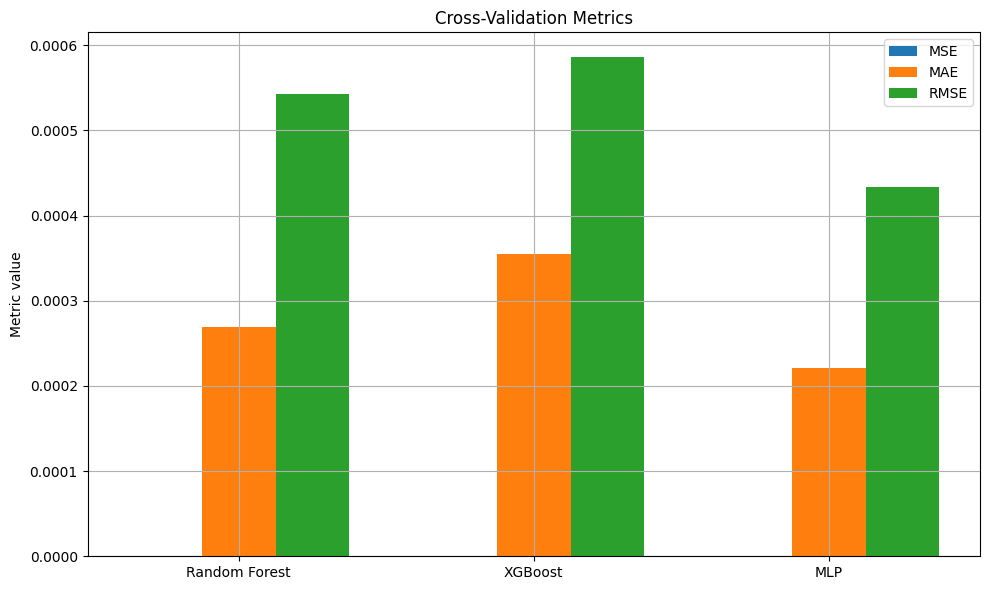

📊 Graph saved in: img/cv_metrics_th=0.005.png


In [4]:
from scripts.evaluate import k_fold_cross_val
from scripts.render import compare_cv_results
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

rf_metrics = k_fold_cross_val(df, model_fn=lambda: RandomForestRegressor(), use_scaling=False, threshold=0.005)
xgb_metrics = k_fold_cross_val(df, model_fn=lambda: XGBRegressor(), use_scaling=False, threshold=0.005)
mlp_metrics = k_fold_cross_val(df, model_fn=lambda: None, use_scaling=True, use_torch_wrapper=True, threshold=0.005)

compare_cv_results(
    results={
        "Random Forest": rf_metrics,
        "XGBoost": xgb_metrics,
        "MLP": mlp_metrics
    },
    title="Cross-Validation Metrics",
    save_path_img="img/cv_metrics_th=0.005.png",
    save_path_csv="results/cv_metrics_th=0.005.csv"
)